In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

#### 1. Import the dataset as netflix.

In [2]:
netflix = pd.read_csv("netflix_titles - netflix_titles.csv")

#### 2. Display the first 10 rows of the dataset.

In [3]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


#### 3. Get information (info()) about the dataset.


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


#### 4. Show the shape (number of rows and columns).

In [5]:
netflix.shape

(6234, 12)

#### 5. Print all column names.

In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### 6. Display the 200th observation.

In [7]:
netflix.iloc[199]

show_id                                                  80991316
type                                                        Movie
title                                                  Avengement
director                                         Jesse V. Johnson
cast            Scott Adkins, Craig Fairbrass, Thomas Turgoose...
country                                            United Kingdom
date_added                                     September 17, 2019
release_year                                                 2019
rating                                                      TV-MA
duration                                                   88 min
listed_in                                      Action & Adventure
description     Betrayed by his loan shark brother, a hardened...
Name: 199, dtype: object

#### 7. Select the column title.

In [8]:
netflix["title"]

0           Norm of the North: King Sized Adventure
1                        Jandino: Whatever it Takes
2                                Transformers Prime
3                  Transformers: Robots in Disguise
4                                      #realityhigh
                           ...                     
6229                                   Red vs. Blue
6230                                          Maron
6231         Little Baby Bum: Nursery Rhyme Friends
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 6234, dtype: object

#### 8. Sort the dataset by release_year and title in ascending order.


In [9]:
netflix.sort_values(by = ["release_year", "title"], ascending=[True, True])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4292,81030762,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...
2011,60027945,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
2013,60027942,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
2022,80119186,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
2026,70022548,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,NR,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
...,...,...,...,...,...,...,...,...,...,...,...,...
3325,81160763,TV Show,"Sex, Explained",NaN,Janelle Monáe,United States,"January 2, 2020",2020,TV-MA,1 Season,"Docuseries, Science & Nature TV",From the biology of attraction to the history ...
3562,80201590,TV Show,Spinning Out,NaN,"Kaya Scodelario, January Jones, Will Kemp, Wil...",NaN,"January 1, 2020",2020,TV-MA,1 Season,TV Dramas,A figure skating Olympic hopeful struggles to ...
3573,81044551,TV Show,The Circle,NaN,Michelle Buteau,NaN,"January 1, 2020",2020,TV-MA,1 Season,Reality TV,Status and strategy collide in this social exp...
3436,80239306,TV Show,The Healing Powers of Dude,NaN,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",NaN,"January 13, 2020",2020,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas",When an 11-year-old boy with social anxiety di...


#### 9. Filter all shows with type = 'Movie' and release_year > 2015.


In [10]:
netflix[(netflix["type"] == "Movie") & (netflix["release_year"] > 2015)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
...,...,...,...,...,...,...,...,...,...,...,...,...
5571,80100054,Movie,Skins,Eduardo Casanova,"Ana Polvorosa, Candela Peña, Macarena Gómez, C...",Spain,"April 1, 2017",2017,TV-MA,78 min,"Dramas, International Movies","Deformed, disfigured characters must find a wa..."
5572,80097468,Movie,The Bad Kids,"Keith Fulton, Louis Pepe",NaN,United States,"April 1, 2017",2016,TV-MA,101 min,Documentaries,"In this documentary, teachers at a Mojave Dese..."
5574,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",2016,TV-MA,81 min,"Dramas, International Movies",After spending much of his adult life in New Y...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...


#### 10. Drop the column show_id.


In [11]:
netflix.drop("show_id", axis=1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


#### 11. Find how many unique countries exist in the dataset.


In [12]:
netflix["country"].nunique()

554

#### 12. Show the count of missing values in each column.


In [13]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

#### 13. Replace missing values in director with "Unknown".


In [14]:
netflix["director"].fillna("Unknown")

0       Richard Finn, Tim Maltby
1                        Unknown
2                        Unknown
3                        Unknown
4               Fernando Lebrija
                  ...           
6229                     Unknown
6230                     Unknown
6231                     Unknown
6232                     Unknown
6233                     Unknown
Name: director, Length: 6234, dtype: object

#### 14. Replace missing values in rating with "Not Rated".


In [15]:
netflix["rating"].fillna("Not Rated")

0           TV-PG
1           TV-MA
2        TV-Y7-FV
3           TV-Y7
4           TV-14
          ...    
6229           NR
6230        TV-MA
6231    Not Rated
6232        TV-MA
6233        TV-14
Name: rating, Length: 6234, dtype: object

#### 15. Standardize the duration column (split into numeric and type: e.g., minutes or seasons).


In [16]:
netflix[['duration_value', 'duration_type']] = netflix['duration'].str.split('', n=1, expand=True)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_type
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,,90 min
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,,94 min
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",,1 Season
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,,1 Season
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,,99 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",,13 Seasons
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",,4 Seasons
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,,60 min
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",,2 Seasons


#### 16. Convert release_year to integer if not already.

In [17]:
netflix["release_year"] = netflix["release_year"].astype(int)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_type
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,,90 min
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,,94 min
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",,1 Season
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,,1 Season
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,,99 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",,13 Seasons
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",,4 Seasons
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,,60 min
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",,2 Seasons


#### 17. Find the mean, min, and max release year.


In [18]:
meanYear = netflix["release_year"].mean()
minYear = netflix["release_year"].min()
maxYear = netflix["release_year"].max()

print(f"Mean year: {meanYear} \n Min year: {minYear} \n Max year: {maxYear}")

Mean year: 2013.3593198588387 
 Min year: 1925 
 Max year: 2020


#### 18. Find the most common rating for movies.


In [19]:
movies = netflix[netflix["type"] == "Movie"]
movies["rating"].mode()

0    TV-MA
Name: rating, dtype: object

#### 19. Show top 5 countries with the most Netflix titles.


In [20]:
top5 = netflix["country"].value_counts().head(5)
print(top5)

country
United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
Name: count, dtype: int64


#### 20. Find how many Movies and TV Shows exist in total (value_counts).


In [21]:
counts = netflix["type"].value_counts()

print(counts["Movie"], counts["TV Show"])

4265 1969


#### 21. Display summary statistics using describe().


In [22]:
netflix.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


#### 22. Group by type and find the average release year.


In [23]:
grouped = netflix.groupby("type")
grouped["release_year"].mean()

type
Movie      2012.354279
TV Show    2015.536313
Name: release_year, dtype: float64

#### 23. Group by country and count the number of Movies and TV Shows.


In [24]:
grouped = netflix.groupby("country")
counting = grouped["type"].value_counts().unstack(fill_value=0)
print(counting)

type                                                Movie  TV Show
country                                                           
Argentina                                              26       12
Argentina, Brazil, France, Poland, Germany, Den...      1        0
Argentina, Chile                                        1        0
Argentina, Chile, Peru                                  1        0
Argentina, France                                       1        0
...                                                   ...      ...
Uruguay, Spain, Mexico                                  1        0
Venezuela                                               1        0
Venezuela, Colombia                                     1        0
Vietnam                                                 4        0
West Germany                                            1        0

[554 rows x 2 columns]


#### 24. Find the top 10 directors with the highest number of titles.


In [25]:
directors = netflix["director"].value_counts().head(10)
print(directors)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Martin Scorsese            9
Steven Spielberg           9
Johnnie To                 8
Lance Bangs                8
David Dhawan               8
Hakan Algül                7
Name: count, dtype: int64


#### 25. Count how many titles per rating Netflix has.


In [26]:
netflix["rating"].value_counts()

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64

#### 26. For each type (Movie/TV Show), find the oldest and newest release year.


In [27]:
movieType = netflix[netflix["type"] == "Movie"]
sortedMovie = movieType.sort_values("release_year")
print(sortedMovie.iloc[0], "\n")
print(sortedMovie.iloc[-1])

show_id                                                    60027945
type                                                          Movie
title                                                Prelude to War
director                                                Frank Capra
cast                                                            NaN
country                                               United States
date_added                                           March 31, 2017
release_year                                                   1942
rating                                                        TV-PG
duration                                                     52 min
listed_in                             Classic Movies, Documentaries
description       Frank Capra's documentary chronicles the rise ...
duration_value                                                     
duration_type                                                52 min
Name: 2011, dtype: object 

show_id             

In [28]:
showType = netflix[netflix["type"] == "TV Show"]
sortedShow = showType.sort_values("release_year")
print(sortedShow.iloc[0], "\n")
print(sortedShow.iloc[-1])

show_id                                                    81030762
type                                                        TV Show
title                             Pioneers: First Women Filmmakers*
director                                                        NaN
cast                                                            NaN
country                                                         NaN
date_added                                        December 30, 2018
release_year                                                   1925
rating                                                        TV-PG
duration                                                   1 Season
listed_in                                                  TV Shows
description       This collection restores films from women who ...
duration_value                                                     
duration_type                                              1 Season
Name: 4292, dtype: object 

show_id             

#### 27. Group by release_year and count how many titles were released each year.


In [29]:
w = netflix.groupby("release_year").size()
print(w)

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Length: 72, dtype: int64


#### 28. Create a bar chart showing the number of Movies vs TV Shows.


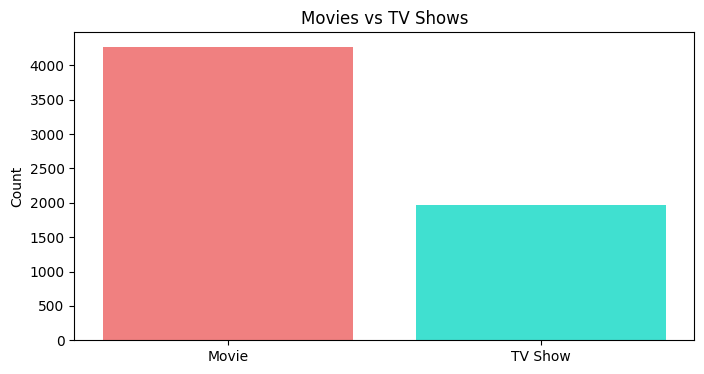

In [30]:
a = netflix[netflix["type"] == "Movie"].shape[0]
b = netflix[netflix["type"] == "TV Show"].shape[0]
z = [a, b]
y = ["Movie", "TV Show"]
colors = ["lightcoral", "turquoise"]

plt.figure(figsize=(8,4))
plt.bar(y, z, color=colors)
plt.title("Movies vs TV Shows")
plt.ylabel("Count")

plt.show()

#### 29. Create a pie chart of the distribution of ratings.


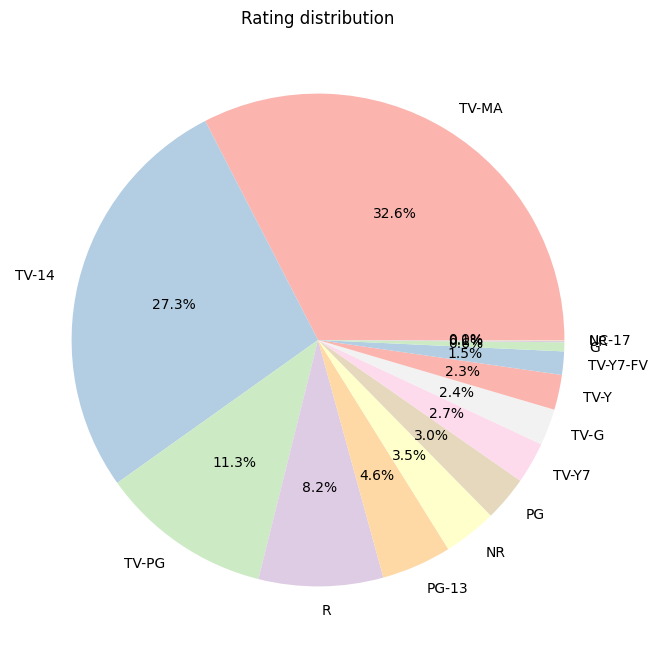

In [31]:
ratingCount = netflix["rating"].value_counts()

plt.figure(figsize=(12,8))
plt.pie(ratingCount, labels=ratingCount.index, autopct="%1.1f%%", colors=plt.cm.Pastel1.colors)
plt.title("Rating distribution")
plt.show()

#### 30. Plot a line chart showing number of releases per year.


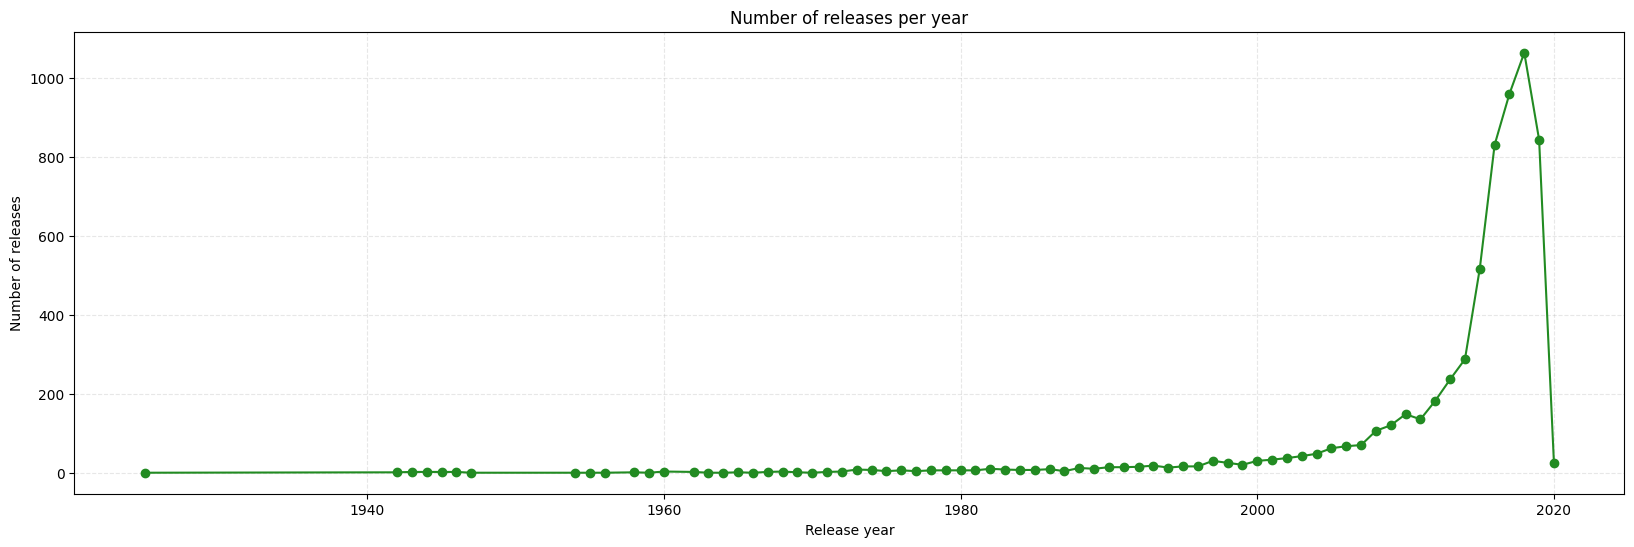

In [32]:
w = netflix.groupby("release_year").size()
plt.figure(figsize=(20,6))
plt.plot(w.index, w.values, marker="o", color = "forestgreen")

plt.title("Number of releases per year")
plt.xlabel("Release year")
plt.ylabel("Number of releases")
plt.grid(True, linestyle="--", alpha=0.3)


plt.show()

#### 31. Show a horizontal bar chart of top 10 countries with most titles.


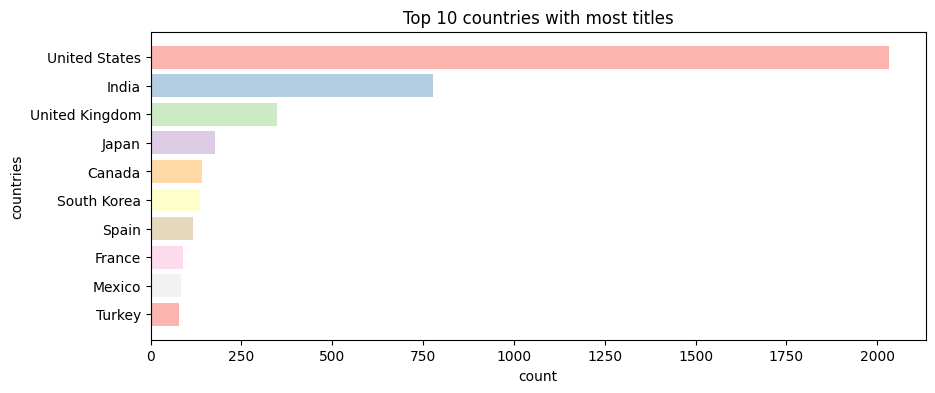

In [33]:
topCountries = netflix["country"].value_counts().head(10)

plt.figure(figsize=(10, 4))
plt.barh(topCountries.index, topCountries.values, color=plt.cm.Pastel1.colors)

plt.title("Top 10 countries with most titles")
plt.xlabel("count")
plt.ylabel("countries")
plt.gca().invert_yaxis()

plt.show()

#### 32. Plot a histogram of release_year distribution.


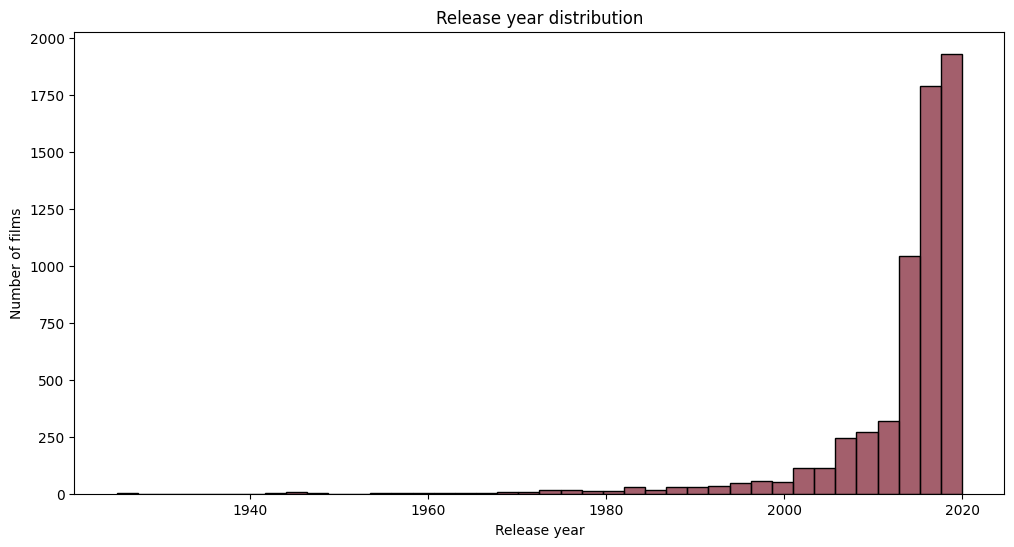

In [34]:
year = netflix["release_year"]

plt.figure(figsize=(12,6))
sns.histplot(year, bins=40, color="#842A3B")
plt.title("Release year distribution")
plt.xlabel("Release year")
plt.ylabel("Number of films")
plt.show()

#### 33. Use seaborn countplot to show counts of each rating category.


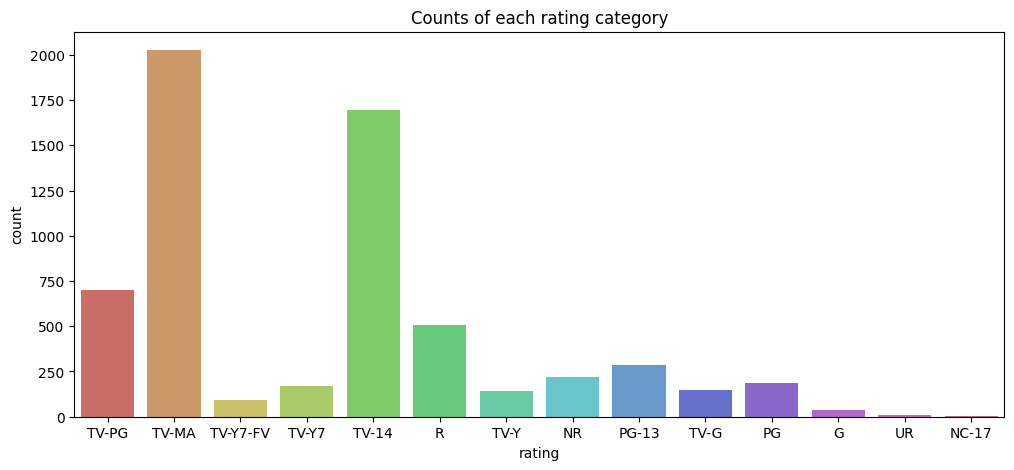

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(data=netflix, x="rating", palette="hls")
plt.title("Counts of each rating category")
plt.show()

#### 34. Create a word cloud for listed_in (genres) column.


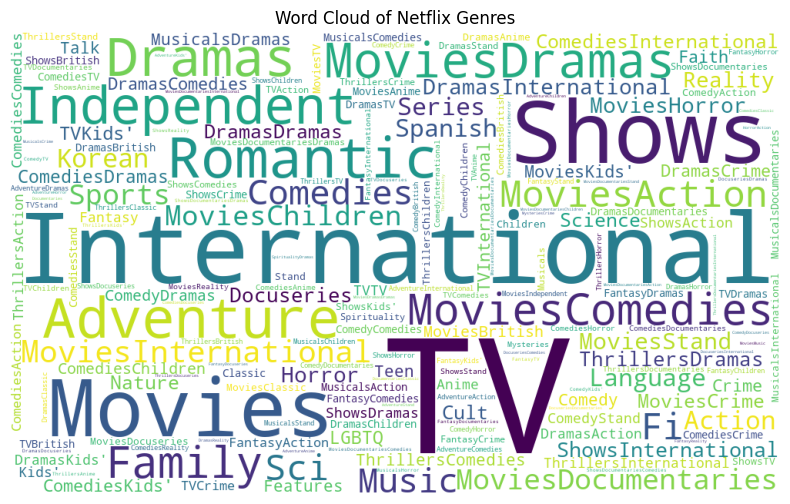

In [36]:
text = "".join(netflix["listed_in"].dropna())

wordcloud = WordCloud(width=1000, height=600, background_color="white", collocations=False).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Netflix Genres")
plt.show()

#### 35. Extract the release decade (e.g., 2000s, 2010s) and count how many shows per decade.


In [37]:
netflix["decade"] = (netflix["release_year"] // 10) * 10
netflix["decade"] = netflix["decade"].astype(str) + "s"

decade_counts = netflix["decade"].value_counts().sort_index()

print(decade_counts)

decade
1920s       1
1940s      15
1950s       6
1960s      21
1970s      56
1980s      89
1990s     191
2000s     625
2010s    5205
2020s      25
Name: count, dtype: int64


#### 36. Find the most frequent genre.


In [38]:
genres = netflix["listed_in"].dropna().str.split(",").explode().str.strip()

commonGenre = genres.value_counts().idxmax()
count = genres.value_counts().max()

print(f"The most frequent movie is '{commonGenre}', with {count} titles.")


The most frequent movie is 'International Movies', with 1927 titles.


#### 37. Find which country produced the most TV Shows.


In [39]:
tv_shows = netflix[netflix["type"] == "TV Show"]
countries = tv_shows["country"].dropna().str.split(",").explode().str.strip()
most_tv_country = countries.value_counts().idxmax()
count = countries.value_counts().max()

print(most_tv_country, count)

United States 686


#### 38. Find the top 5 years with most Movies added.


In [40]:
movieGenre = netflix[netflix["type"] == "Movie"]
years = movieGenre["release_year"].value_counts().head(5)
print(years)

release_year
2017    682
2018    646
2016    593
2019    400
2015    363
Name: count, dtype: int64


#### 39. Check correlation (if numeric columns exist) and plot a heatmap.


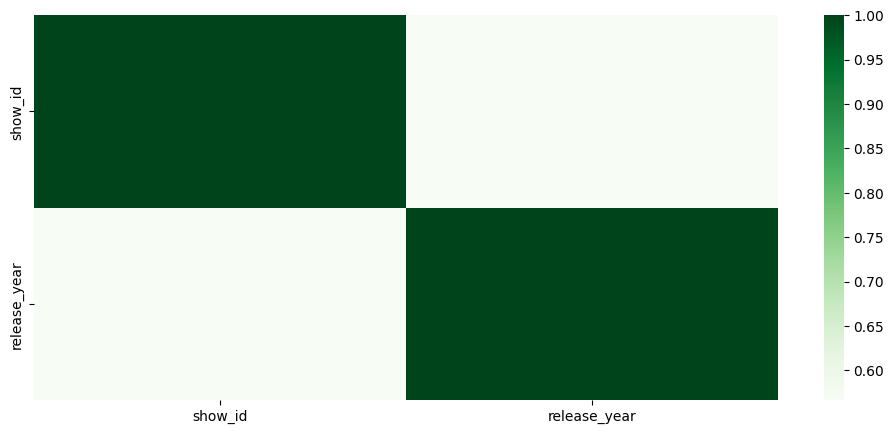

In [41]:
numeric = netflix.select_dtypes(include=["number"])
cor = numeric[["show_id", "release_year"]].corr()

plt.figure(figsize=(12,5))
sns.heatmap(cor, cmap="Greens")
plt.show()

#### 40. Export the cleaned dataset to a new CSV file named netflix_clean.csv.

In [42]:
netflix.to_csv("netflix_clean.csv", index=False)